# Analysis of MADDPG vs DDPG performance in MPE (Multi-Agent Particle Environment)

In each scenario, 10 independent experiments of each combination (ddpg vs maddpg, ddpg vs ddpg, etc) were conducted for 25 000 episodes. At the end of 25 000 episodes, each set of trained agents were put through 1000 episodes each and rewards plotted in the boxplots below. In all experiments, default/suggested (in the Lowe et al paper) settings were used besides those that are marked with the post-fix "128 hidden units" which had 128 units in hidden layers as opposed to the default of 64 units. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## Helper functions

In [2]:
def load_data(exp_fp):
    """
    Load log files from ONE run
    input:
        exp_fp: filepath to run directory
    return:
        dictionary of log_type (key) : logging info (values) pairs
    """
    files = ['eval_individual_rewards', 'eval_overall_rewards', 'individual_rewards', 'overall_rewards']
    data = {}
    for file in files:
        with open(os.path.join(exp_fp, 'logs', f'{file}.pkl'), 'rb') as f:
            data[file] = np.array(pickle.load(f))[:]
    return data

def load_data_from_list(exp_fp_list):
    """
    Load log files from from runs in a list of filepaths
    input:
        exp_fp_list: list of filepaths to load log files from
    return:
        dictionary of log_type (key) : logging info (values) pairs from all runs in list 
    """
    data = {}
    keys = ['eval_individual_rewards', 'eval_overall_rewards', 'individual_rewards', 'overall_rewards']
    for fp in exp_fp_list:
        d = load_data(fp)
        for key in keys:
            if key not in data:
                data[key] = [d[key]]
            else:
                data[key].append(d[key])
    for key in keys:
        try:
            data[key] = np.stack(data[key])
        except Exception as e:
            for j in data[key]:
                print(j.shape)
    return data

def make_plots(experiments, title, ylim, idx=0):
    algo_dfs = {}
    algo_means = {}
    algos = []
    
    for algo in experiments:
        print(f'loading {algo}...')
        fps = experiments[algo]
        algos.append(algo)
        exp_data = load_data_from_list(fps)['eval_individual_rewards'][:,idx,:-1]
        algo_dfs[algo] = pd.DataFrame(exp_data.T, columns=[f'run-{i}' for i in range(1,len(exp_data) + 1)])
        algo_means[algo] = algo_dfs[algo].mean(0)
        print(f'{algo} loaded with {algo_dfs[algo].shape} data points...')
    
    means_df = pd.DataFrame(algo_means)
    
    fig_cols = means_df.shape[1]
    fig = plt.figure(figsize=(20,10))
    gs = fig.add_gridspec(2, fig_cols)
    
    for i, algo in enumerate(algo_dfs):
        fig.add_subplot(gs[0, i])
        # plt.subplot(1, fig_cols + 1, i + 1)
        sns.boxplot(x='run', y='reward',data=algo_dfs[algo].melt(var_name='run', value_name='reward'))
        plt.xticks(rotation=45)
        plt.xlabel('')
        plt.ylim(*ylim)
        plt.title(f'{algo} rewards')
        
    fig.add_subplot(gs[1,:])
    # plt.subplot(1,fig_cols + 1, fig_cols + 1)
    
    melted_means_df = means_df.melt(value_name='reward', var_name='algo')
    sns.boxplot(y='algo', x='reward', data=melted_means_df, orient='h')
    plt.ylabel('average rewward (1000 it)')
    plt.title('Average rewards')

    plt.suptitle(title, y=1.02, x=0.5, size=20)
    plt.tight_layout()

## Simple Speaker Listener Scenario

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


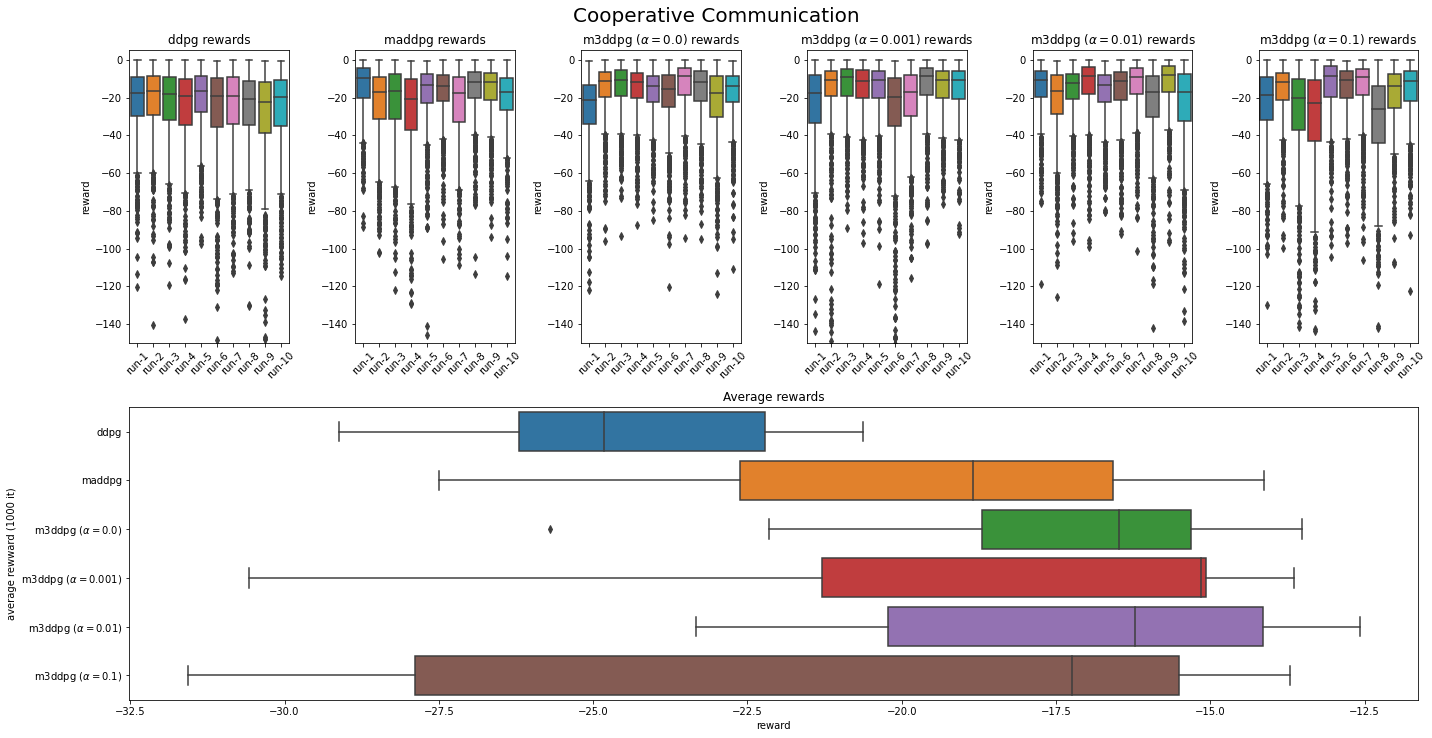

In [130]:
make_plots({'ddpg': [f'simple_speaker_listener/ddpg-run-{i}' for i in range(1,11)],
                   'maddpg': [f'simple_speaker_listener/maddpg-run-{i}' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.0$)': [f'simple_speaker_listener/m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.001$)': [f'simple_speaker_listener/m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.01$)': [f'simple_speaker_listener/m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.1$)': [f'simple_speaker_listener/m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
                  'Cooperative Communication',
                  (-150,5))

plt.savefig('plots/cooperative_communication_comparison.png', dpi=200)

## Simple Spread (64 units)

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


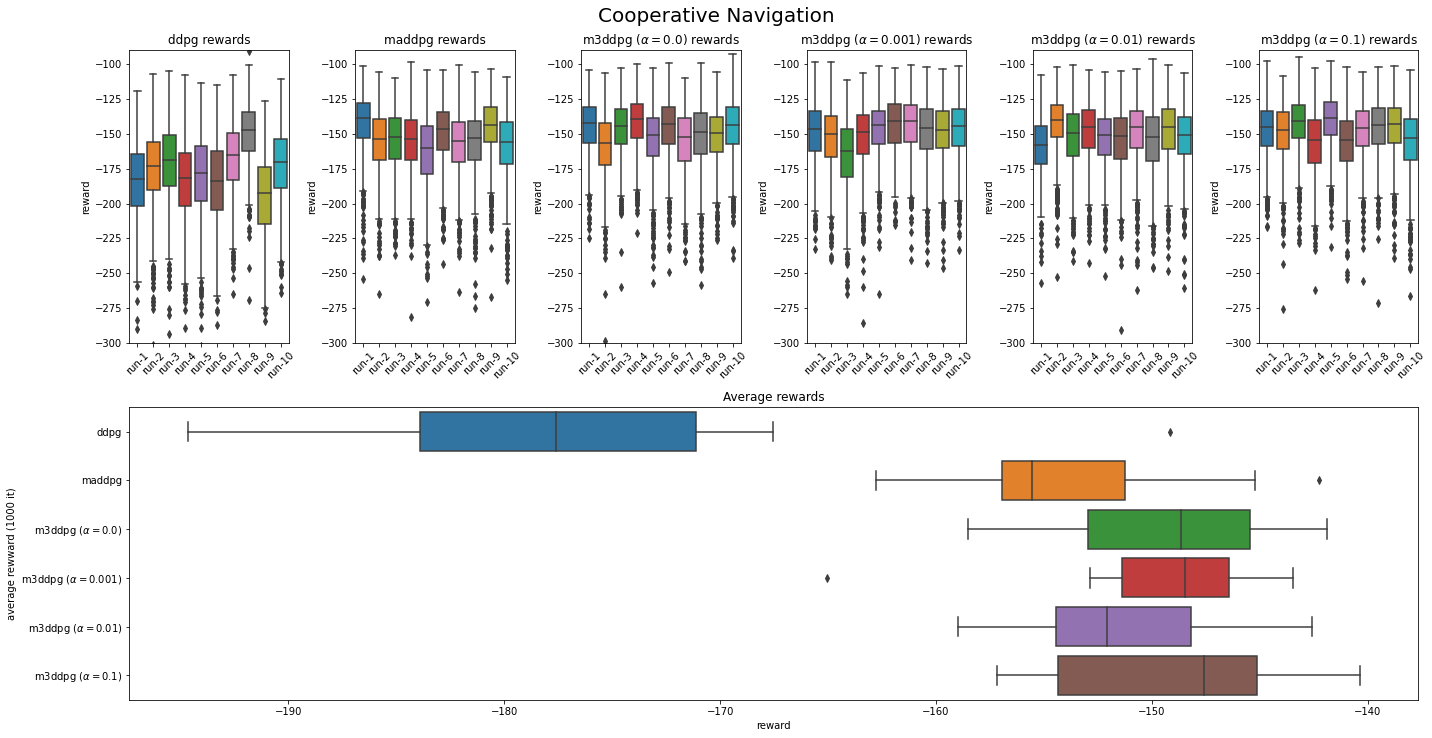

In [134]:
make_plots({'ddpg': [f'simple_spread/ddpg-run-{i}' for i in range(1,11)],
                   'maddpg': [f'simple_spread/maddpg-run-{i}' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.0$)': [f'simple_spread/m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.001$)': [f'simple_spread/m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.01$)': [f'simple_spread/m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.1$)': [f'simple_spread/m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
                  'Cooperative Navigation', 
                  (-300,-90))

plt.savefig('plots/cooperative_navigation_comparison.png', dpi=200)

## Simple Spread (128 units in hidden layer)

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


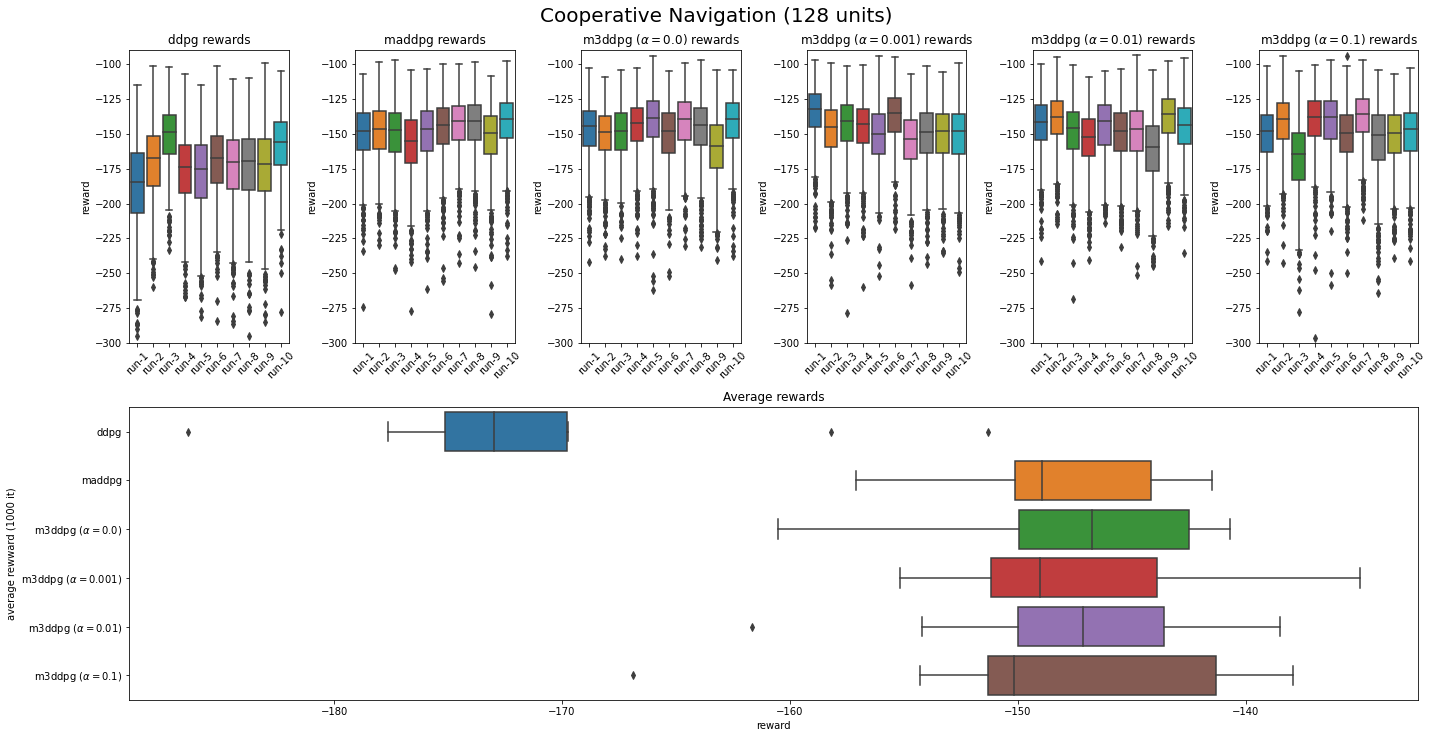

In [138]:
make_plots({'ddpg': [f'simple_spread_128_units/ddpg-run-{i}' for i in range(1,11)],
                   'maddpg': [f'simple_spread_128_units/maddpg-run-{i}' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.0$)': [f'simple_spread_128_units/m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.001$)': [f'simple_spread_128_units/m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.01$)': [f'simple_spread_128_units/m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
                   r'm3ddpg ($\alpha = 0.1$)': [f'simple_spread_128_units/m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
                  'Cooperative Navigation (128 units)', 
                  (-300,-90))

plt.savefig('plots/cooperative_navigation_128_units_comparison.png', dpi=200)

## Simple Tag (64 units in hidden layer)

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


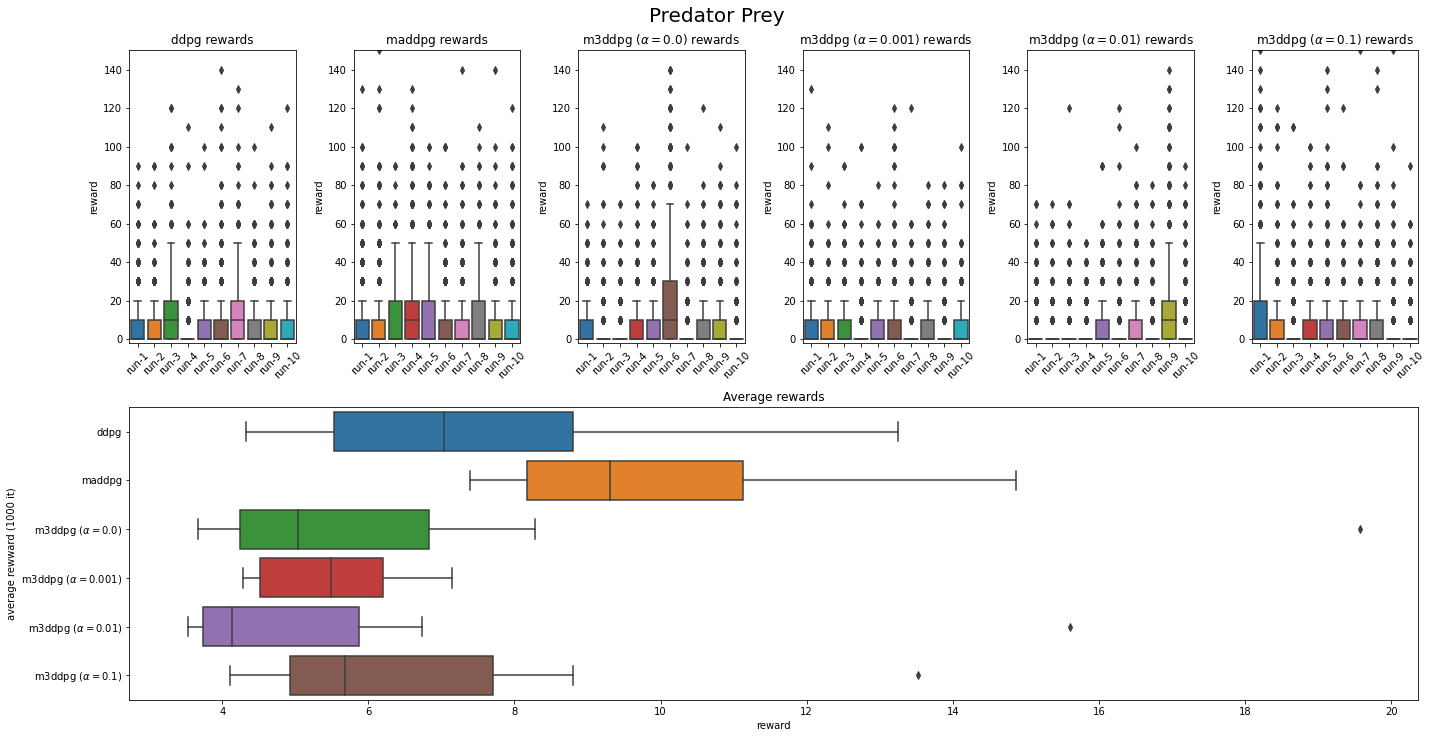

In [161]:
make_plots({'ddpg': [f'simple_tag/ddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            'maddpg': [f'simple_tag/ddpg-vs-maddpg-run-{i}' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.0$)': [f'simple_tag/ddpg-vs-m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.001$)': [f'simple_tag/ddpg-vs-m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.01$)': [f'simple_tag/ddpg-vs-m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.1$)': [f'simple_tag/ddpg-vs-m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
            'Predator Prey', 
            (-2, 150),
            idx=0)

plt.savefig('plots/predator_prey_comparison.png', dpi=200)

## Simple Tag (128 units in hidden layer)

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


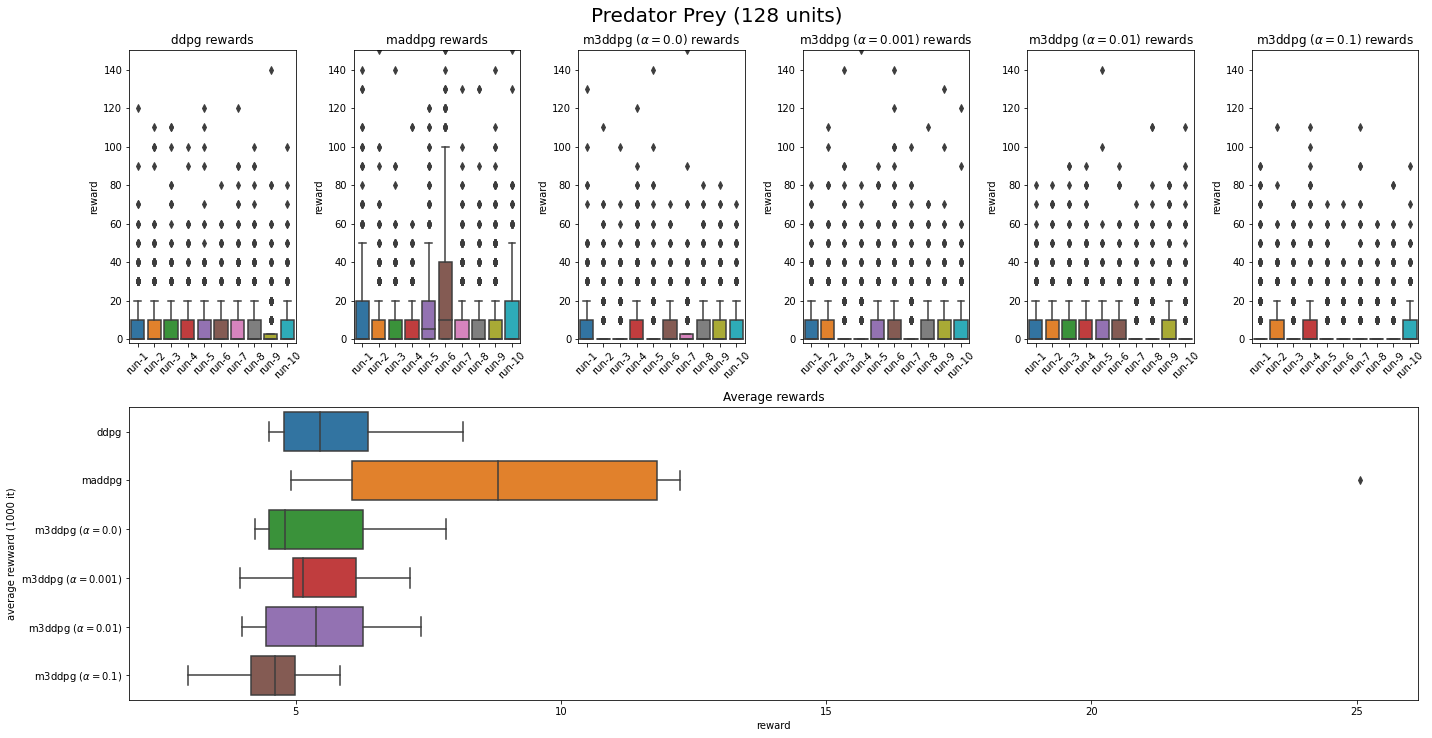

In [162]:
make_plots({'ddpg': [f'simple_tag_128_units/ddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            'maddpg': [f'simple_tag_128_units/ddpg-vs-maddpg-run-{i}' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.0$)': [f'simple_tag_128_units/ddpg-vs-m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.001$)': [f'simple_tag_128_units/ddpg-vs-m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.01$)': [f'simple_tag_128_units/ddpg-vs-m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.1$)': [f'simple_tag_128_units/ddpg-vs-m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
            'Predator Prey (128 units)', 
            (-2, 150),
            idx=0)

plt.savefig('plots/predator_prey_128_units_comparison.png', dpi=200)

## Simple adversary

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


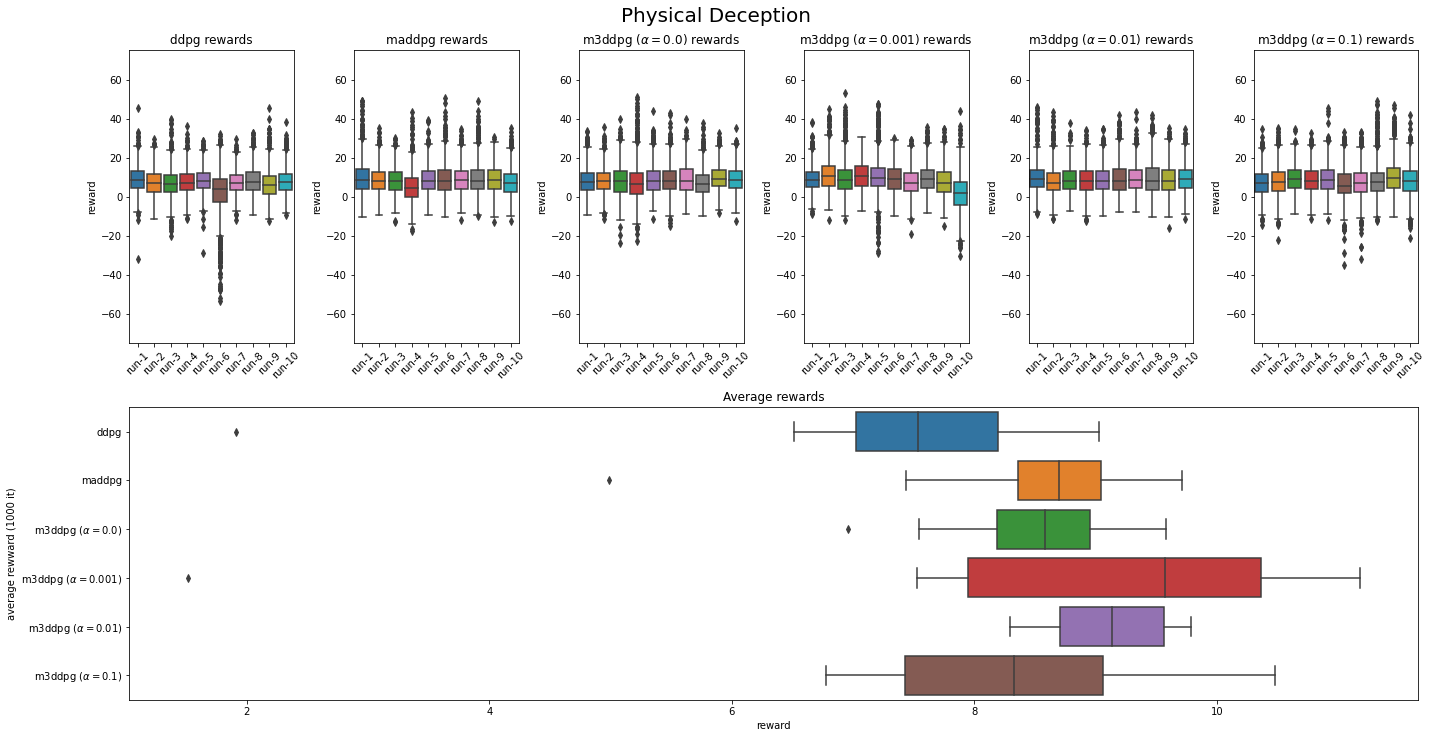

In [3]:
make_plots({'ddpg': [f'simple_adversary/ddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            'maddpg': [f'simple_adversary/maddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.0$)': [f'simple_adversary/m3ddpg-vs-ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.001$)': [f'simple_adversary/m3ddpg-vs-ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.01$)': [f'simple_adversary/m3ddpg-vs-ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.1$)': [f'simple_adversary/m3ddpg-vs-ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
            'Physical Deception', 
            (-75,75),
            idx=1)

plt.savefig('plots/physical_deception_comparison.png', dpi=200)

## Simple Push

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


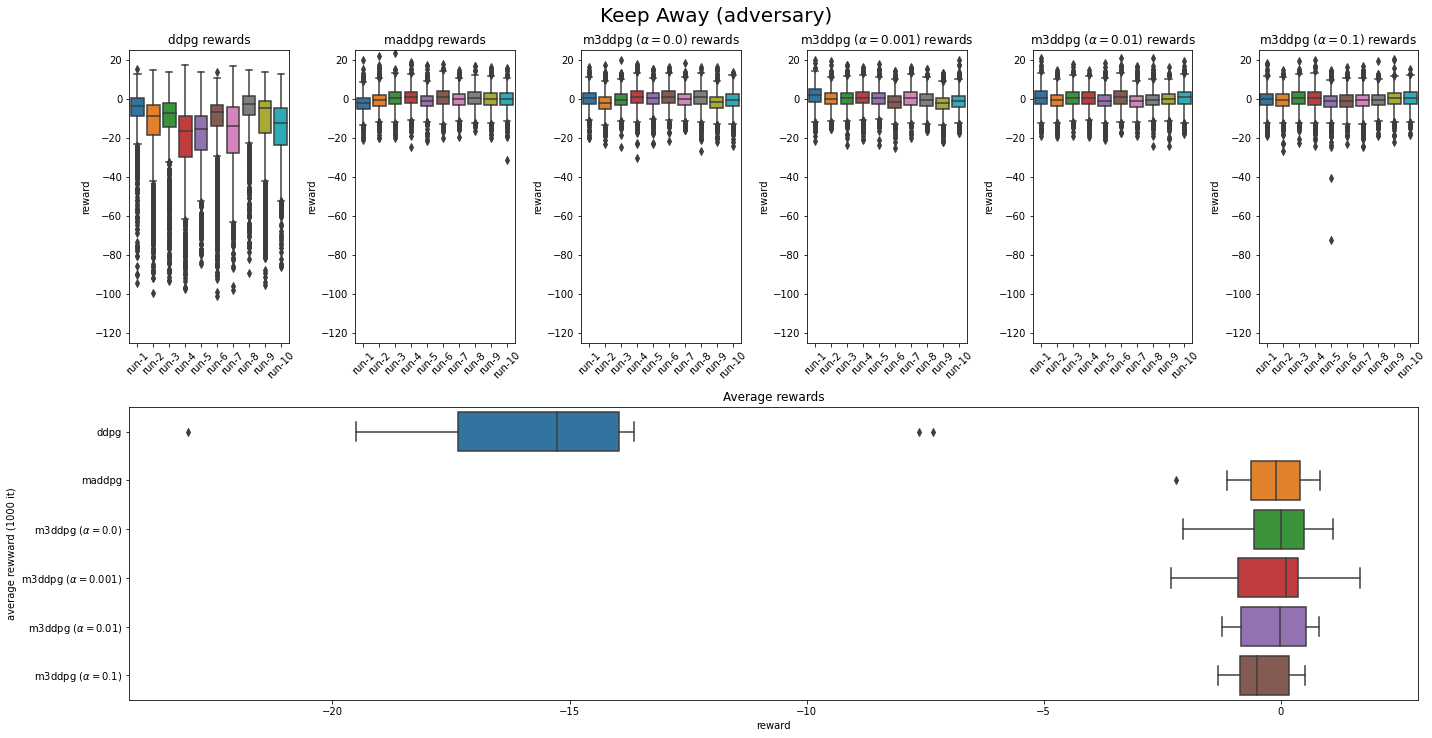

In [172]:
make_plots({'ddpg': [f'simple_push/ddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            'maddpg': [f'simple_push/ddpg-vs-maddpg-run-{i}' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.0$)': [f'simple_push/ddpg-vs-m3ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.001$)': [f'simple_push/ddpg-vs-m3ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.01$)': [f'simple_push/ddpg-vs-m3ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.1$)': [f'simple_push/ddpg-vs-m3ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
            'Keep Away (adversary)',
            (-125,25),
            idx=0)

plt.savefig('plots/keep_away_comparison(adv).png', dpi=200)

loading ddpg...
ddpg loaded with (1000, 10) data points...
loading maddpg...
maddpg loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.0$)...
m3ddpg ($\alpha = 0.0$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.001$)...
m3ddpg ($\alpha = 0.001$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.01$)...
m3ddpg ($\alpha = 0.01$) loaded with (1000, 10) data points...
loading m3ddpg ($\alpha = 0.1$)...
m3ddpg ($\alpha = 0.1$) loaded with (1000, 10) data points...


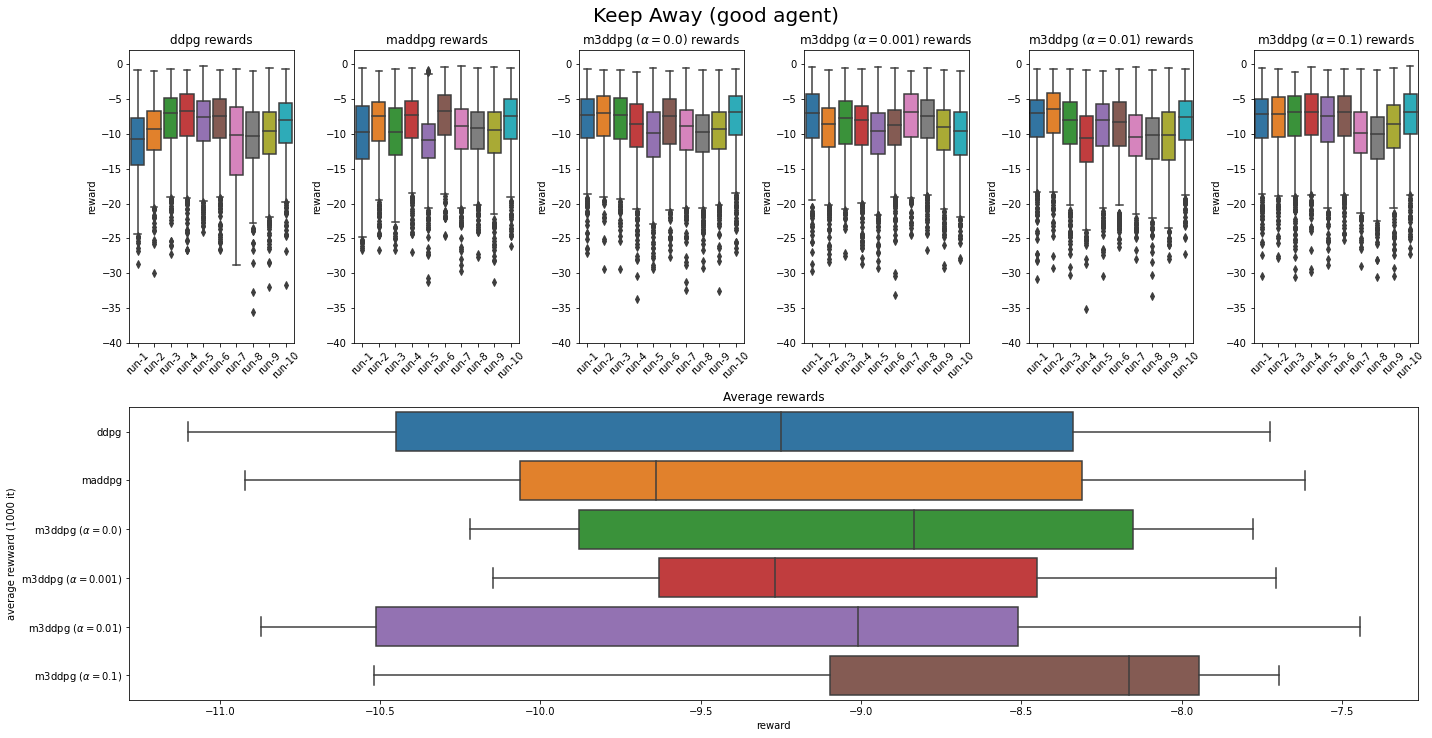

In [173]:
make_plots({'ddpg': [f'simple_push/ddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            'maddpg': [f'simple_push/maddpg-vs-ddpg-run-{i}' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.0$)': [f'simple_push/m3ddpg-vs-ddpg-run-{i}_perturbation-0.0' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.001$)': [f'simple_push/m3ddpg-vs-ddpg-run-{i}_perturbation-0.001' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.01$)': [f'simple_push/m3ddpg-vs-ddpg-run-{i}_perturbation-0.01' for i in range(1,11)],
            r'm3ddpg ($\alpha = 0.1$)': [f'simple_push/m3ddpg-vs-ddpg-run-{i}_perturbation-0.1' for i in range(1,11)]},
            'Keep Away (good agent)',
            (-40,2),
            idx=1)

plt.savefig('plots/keep_away_comparison(good).png', dpi=200)